# Assignment 3


Ali Karimi UCID:30225064

## Excercise2

### Part (a)

In [ ]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def monte_carlo_integration_circle(N,a,b):
    # Define the function g(x) for a quarter circle of radius 1
    def g(x,a,b):
        return np.sqrt((b-a)**2 - x**2)
    # Draw N random uniform samples in the interval [a, b]
    x_samples = np.random.uniform(a, b, N)

    # Calculate the values of g(x) for each sample
    g_values = g(x_samples,a,b)

    # Approximate the integral I
    I = (b - a) * np.sum(g_values) / N
    sd= np.sqrt(np.sum((g_values - np.mean(g_values))**2/(N*(N-1)))) #sg/sqrt(n)
    # Since we are calculating for a quarter circle, multiply by 4 to get π
    pi_estimate = 4 * I
    return pi_estimate,sd
# Determine the number of samples needed to achieve an average precision of 0.1%
precision_goal = 0.001
max_iterations = 100000
samples=[] # Accepted number of samples
i=2
while i<max_iterations:
    pi_estimate,sd = monte_carlo_integration_circle(i,0,1)
    if sd/np.pi <= precision_goal:
      samples.append(i)
    i+=1

Done!


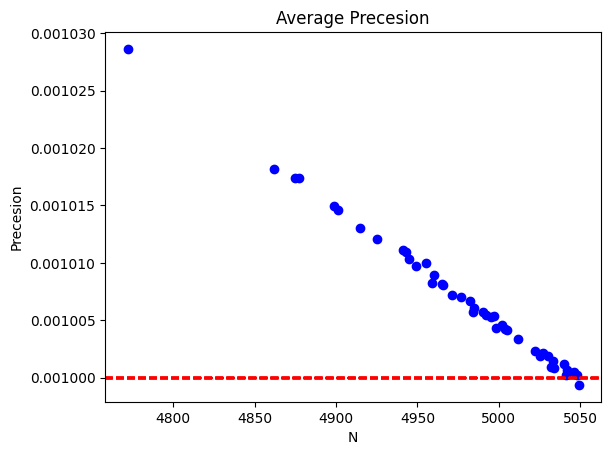

Traditional Monte Carlo method: Estimated π = 3.141638596225466 with 5049 samples


In [ ]:
r=1000 # this shows how many times we run the experiment to calculate average precision
for i in range(len(samples)):
    pi_estimates = []
    pr=[]
    for _ in range(r):
        pi_estimate,sd = monte_carlo_integration_circle(samples[i],0,1)
        pr.append(sd/np.pi)
        pi_estimates.append(pi_estimate)
    plt.scatter(samples[i], np.mean(pr),color='b')
    plt.title('Average Precesion')
    plt.xlabel('N')
    plt.ylabel('Precesion')
    plt.axhline(0.001, color='r', linestyle='--', label='0.1%')
    if np.mean(pr) <= precision_goal:# Checking the average precesion
        n_sample=samples[i]
        print("Done!")
        plt.show()
        break

print(f"Traditional Monte Carlo method: Estimated π = {np.mean(pi_estimates)} with {n_sample} samples")

As you can see with around 5000 samples you can have an average precesion of 0.1 % .

### Part (b)

The hit-or-miss method involves randomly sampling points in a unit square and counting how many fall inside the quarter circle. The ratio of points inside the circle to the total number of points approximates π/4.

In [ ]:
def hit_or_miss_monte_carlo_circle(N,a,b,c):
    # Draw N random uniform samples in the unit square [a,b] x [0, c]
    x_samples = np.random.uniform(a, b, N)
    y_samples = np.random.uniform(0, c, N)

    # Count the number of points that fall inside the circle
    inside_circle = np.sum(x_samples**2 + y_samples**2 <= 1)
    p=inside_circle / N
    # Approximate π using the ratio of points inside the circle to total points
    pi_estimate = 4 * p * c * (b-a)
    sd= np.sqrt(p*(1-p)/N) #error
    return pi_estimate,sd

# Determine the number of samples needed to achieve an average precision of 0.1%
precision_goal = 0.001
max_iterations = 100000
samples=[] # Accepted number of samples
i=2
while i<max_iterations:
    pi_estimate,sd = hit_or_miss_monte_carlo_circle(i,0,1,1)
    if sd/np.pi <= precision_goal:
      samples.append(i)
    i+=1

Done!


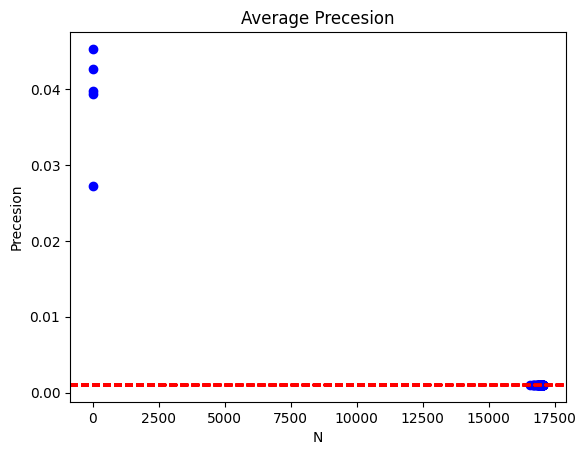

Hit-or-Miss Monte Carlo method: Estimated π = 3.141923644454854 with 17078 samples


In [ ]:
r=1000 # this shows how many times we run the experiment to calculate average precision
# Note that I have choosed this number based on a reasonable running time
for i in range(len(samples)):
    pi_estimates = []
    pr=[]
    for _ in range(r):
        pi_estimate,sd = hit_or_miss_monte_carlo_circle(samples[i],0,1,1)
        pr.append(sd/np.pi)
        pi_estimates.append(pi_estimate)
    plt.scatter(samples[i], np.mean(pr),color='b')
    plt.title('Average Precesion')
    plt.xlabel('N')
    plt.ylabel('Precesion')
    plt.axhline(0.001, color='r', linestyle='--', label='0.1%')
    if np.mean(pr) <= precision_goal:# Checking the average precesion
        n_sample=samples[i]
        print("Done!")
        plt.show()
        break

print(f"Hit-or-Miss Monte Carlo method: Estimated π = {np.mean(pi_estimates)} with {n_sample} samples")

As you can see with around 17000 samples you can have an average precesion of 0.1 % . This shows that traditional method is a better way to estimate $\pi$ because with a significantly less number of samples we can reach the required precesion.